<a href="https://colab.research.google.com/github/xbadiam/Portfolio/blob/main/Preventive_Maintenance/Nasa_Turbofan_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NASA Turbofan Engine

## Mantenimiento Predictivo en la Industria 4.0: Anticipación de Fallos y Optimización de Maquinaria mediante Machine Learning.

## 1. Introducción

El objetivo de este conjunto de datos es predecir la vida útil remanente (RUL, por sus siglas en inglés) de cada motor en el conjunto de prueba. La RUL equivale al número de vuelos restantes para el motor después del último punto de datos en el conjunto de prueba.






In [1]:
! git clone https://github.com/xbadiam/Portfolio.git

Cloning into 'Portfolio'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 127 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (127/127), 9.88 MiB | 4.55 MiB/s, done.
Resolving deltas: 100% (38/38), done.


## 2. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3. Funciones especiales

## 4. Carga de los datos



In [3]:
# Cargar los datos de entrenamiento
train_data = pd.read_csv("/content/Portfolio/Preventive_Maintenance/train_FD001.txt", sep=' ', header=None)

# Cargar los datos de prueba
test_data = pd.read_csv("/content/Portfolio/Preventive_Maintenance/test_FD001.txt", sep=' ', header=None)

# Cargar la vida útil restante verdadera
truth_data = pd.read_csv("/content/Portfolio/Preventive_Maintenance/RUL_FD001.txt", header=None)


### 4.1. Conjunto de datos

A continuación, se asigna los nombres a las columnas de los tres ficheros. Para ello, se consulta los nombres de las variables facilitados en el entorno web de NASA's Open Data Portal. Cada fila es un instante de los datos tomados durante un único ciclo operativo y cada columna es una variable diferente.

* unit_number: identificador de la unidad (motor)
* time_cycles: time, in cycles
* op_set1: configuración operativa 1
* op_set2: configuración operativa 2
* op_set3: configuración operativa 3
* s_1: medición del sensor 1
* s_2: medición del sensor 1
.......
* s_26 medición del sensor 26

Se cargan tres ficheros de tipo CSVcon los datos de entrenamiento formado por las lecturas de sensores a lo largo d e ciclos operativos completos. Con el fin de dar mejor claridad al alto número de variables en la exploración de los datos, se definen dos variables que permiten separar las variables en dos grupos: datos del motor y los sensores.

In [4]:
#Eliminanos las dos últimas columnas, ya que solo presentan valores NaN
train_data = train_data[train_data.columns[:-2]]
test_data = test_data[test_data.columns[:-2]]

In [5]:
# Define los nombres configuración de los motores y de los sensores separados
unit_settings_names = ['unit_number', 'time_cycles','op_set1', 'op_set2', 'op_set3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]

# Conjunto de los nombres de las variables
column_names = unit_settings_names + sensor_names

train_data.columns = column_names
test_data.columns = column_names
truth_data.columns = ["RUL"]


**Dataframe del conjunto de datos de entrenamiento**

In [6]:
train_data.head()

,unit_number,time_cycles,op_set1,op_set2,op_set3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Cada fila representa una serie de datos tomados durante un ciclo operativo único, y cada columna representa una variable diferente.

**Dataframe del conjunto de datos de test**

In [7]:
test_data.head()

,unit_number,time_cycles,op_set1,op_set2,op_set3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


**Dataframe del conjunto de datos truth_data**

In [8]:
truth_data.head()

,RUL
0,112
1,98
2,69
3,82
4,91


## 5. Exploración de los datos

### 5.1. Resumen de los datos


In [9]:
# Dimensión de los datos
print("Dimensiones de los datos de entrenamiento:", train_data.shape)
print("Dimensiones de los datos de prueba:", test_data.shape)
print("Dimensiones de los datos de RUL:", truth_data.shape)

Dimensiones de los datos de entrenamiento: (20631, 26)
Dimensiones de los datos de prueba: (13096, 26)
Dimensiones de los datos de RUL: (100, 1)


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   op_set1      20631 non-null  float64
 3   op_set2      20631 non-null  float64
 4   op_set3      20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [11]:
truth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


In [12]:
# Valores únicos variable unit_number
train_data['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

En este caso, es una secuencia de números enteros del 1 al 100. Son 100 unidades distintas en el conjunto de datos de entrenamiento.

## 6. Análisis estadístico de los datos

## 6.1. Estadística descriptiva.¶

La función describe() obtiene las estadísticas descriptivas donde se presenta la tendencia central, la dispersión y la forma de distribución del conjunto de datos. Con el fin de facilitar la visualización de los datos estadísticos, se ha separado en dos tablas.

In [13]:
# Valores estadísticos los motores.
train_data[unit_settings_names].describe()

,unit_number,time_cycles,op_set1,op_set2,op_set3
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0
std,29.227633,68.880990,0.002187,0.000293,0.0
min,1.000000,1.000000,-0.008700,-0.000600,100.0
25%,26.000000,52.000000,-0.001500,-0.000200,100.0
50%,52.000000,104.000000,0.000000,0.000000,100.0
75%,77.000000,156.000000,0.001500,0.000300,100.0
max,100.000000,362.000000,0.008700,0.000600,100.0


El rango de los ciclos (time cycles) varía entre 1 y 362, lo cual sugiere que algunos motores tienen un ciclo de vida más corto que otros. La distribución de las variables operativas op_set1 y op_set2 los valores promedio están cerca de cero, presentan cierta variabilidad, lo cual indica cambios en las condiciones de operación. La variable op_set3 presenta valores constantes (100.0) y su desviación estándard es 0. Estas variables se pueden eliminar del conjunto de datos de entrenamiento y test, ya que no contribuyen a la predicción.

In [14]:
# Valores estadísticos de los sensores
train_data[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


Las variables op_set3, s_1, s_5, s_6, s_10, s_16, s_18 y s_19 presentan valores constantes en sus estadísticas descriptivas. Estas variables se eliminan del conjunto de datos de entrenamiento y de test.

In [15]:
# Lista de columnas constantes identificadas
constant_sensors = ['op_set3','s_1','s_5','s_6','s_10','s_16','s_18','s_19']

# Eliminar columnas constantes del dataset
train_data = train_data.drop(columns=constant_sensors)

train_data.head()

,unit_number,time_cycles,op_set1,op_set2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


### 6.2. Distribución de la variable Objetivo

En este análisis, la variable objetivo es el Remaining Useful Life (RUL). El RUL actúa como la etiqueta (objetivo) que se quiere predecir, por lo que debe estar presente en el conjunto de entrenamiento para entrenar los modelos supervisados.

El RUL se calcula a partir de la diferencia entre el ciclo de vida máximo alcanzado por el motor y el ciclo actual de operación.

$$ RUL = \text{Ciclo de vida máximo del motor} - \text{Ciclo actual}$$

Los valores para realizar el cálculo se pueden obtener del mismo dataset de entrenamiento. El ciclo de vida máximo de cada motor puede calcularse agrupando sus diferentes ciclos y obteniendo el ciclo máximo. El ciclo actual se obtiene accediendo al valor de la variable time_cycle.


In [16]:
# Se agrupan los datos por número de unidad (motor)
grouped_by_unit = train_data.groupby(by="unit_number")

# Se obtiene el valor máximo de time_cycles para cada motor.
max_cycle = grouped_by_unit["time_cycles"].max()

# Se agrega en un dataframe la información del ciclo máximo correspondiente a cada motor.
merge_max_cycle = train_data.merge(max_cycle.to_frame(name='max_cycle'), right_index=True, left_on='unit_number')

# se calcula el RUL como la diferencia entre el ciclo máximo y el ciclo actual
rul = merge_max_cycle["max_cycle"] - merge_max_cycle["time_cycles"]

merge_max_cycle["RUL"] = rul

# se elimina max_cycle ya que es necesario
merge_max_cycle = merge_max_cycle.drop("max_cycle", axis=1)

train_data = merge_max_cycle

In [17]:
train_data[['unit_number', 'time_cycles', 'op_set1', 'op_set2','RUL']].head()

,unit_number,time_cycles,op_set1,op_set2,RUL
0,1,1,-0.0007,-0.0004,191
1,1,2,0.0019,-0.0003,190
2,1,3,-0.0043,0.0003,189
3,1,4,0.0007,0.0000,188
4,1,5,-0.0019,-0.0002,187


**Hisntograma de distrubición de RUL**

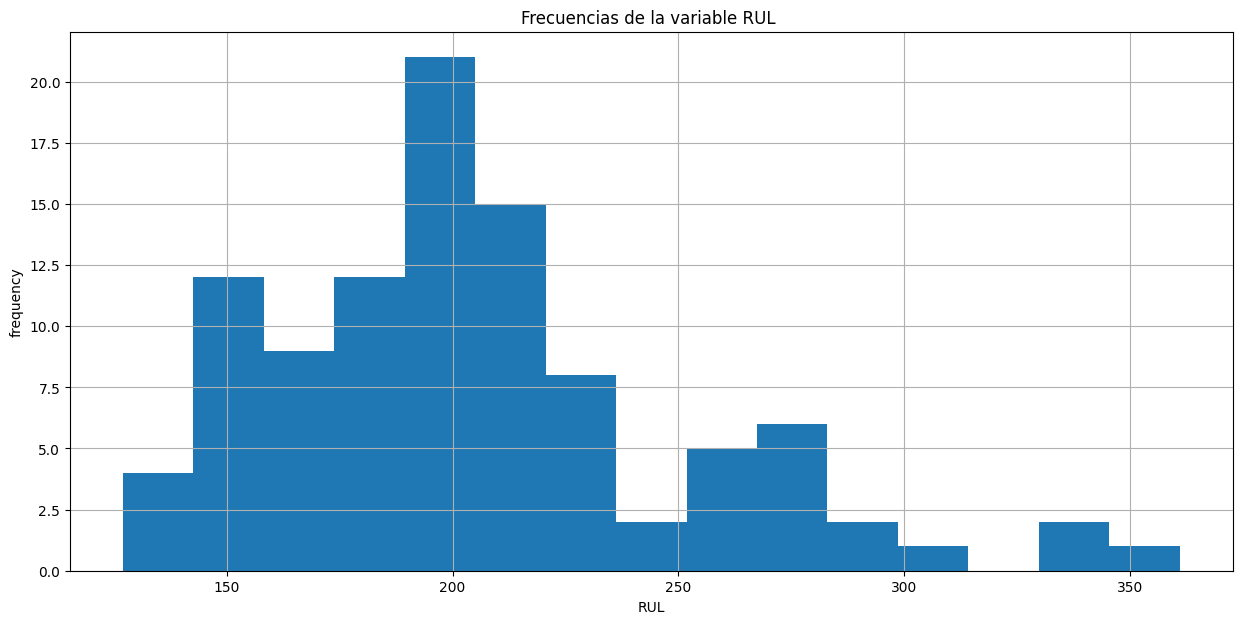

In [18]:
# Distribución de RUL
df_max_rul = train_data[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.title("Frecuencias de la variable RUL ")
plt.show()

El histograma muestra la distribución de la cantidad de ciclos operativos hasta la falla de los motores de turbina. La variable en el eje horizontal representa el número de ciclos, mientras que la frecuencia de cada rango de ciclos se muestra en el eje vertical.

La mayoría de los motores fallan entre 150 y 220 ciclos operativos, tal como se visualiza la concentración más alta de la frecuencia en ese rango. Hay menos motores que alcanzan ciclos operativos superiores a 250 antes de fallar, lo que sugiere que pocos motores tienen una vida útil tan extendida. Esta gráfica es útil el comportamiento de desgaste de los motores, lo cual es relevante para la predicción de la vida útil restante (RUL).

### 6.3. Distribución de las variables predictorias

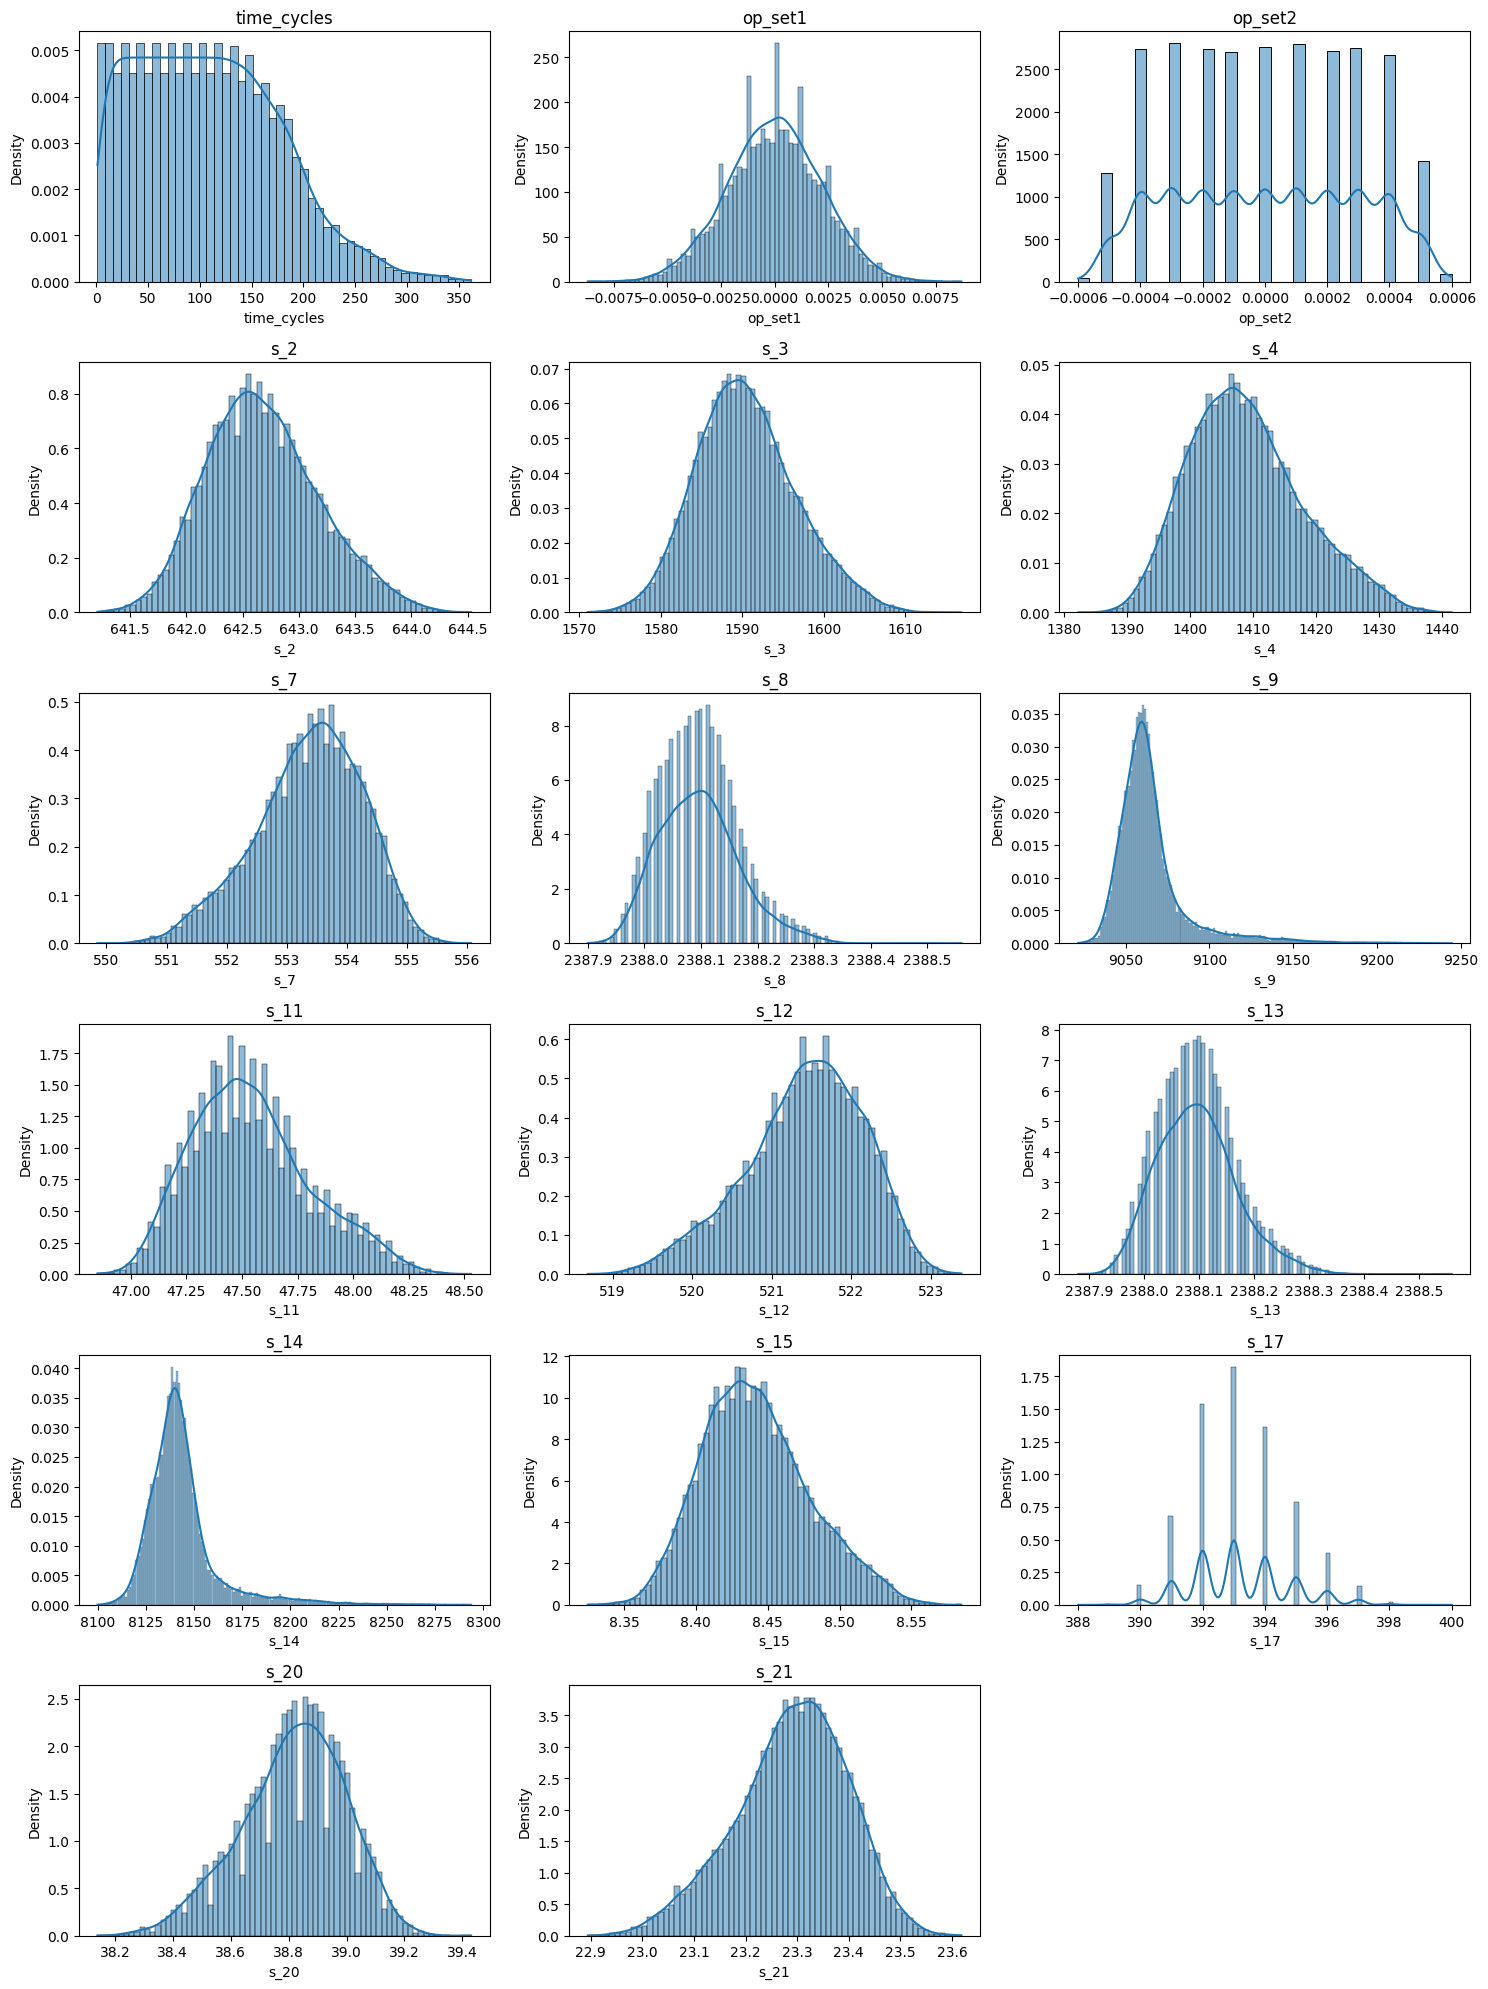

In [19]:
# Seleccionamos las 12 variables predictorias
nrows, ncols = 6, 3
cols = train_data.iloc[:,1:18]

# Crea la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes[:len(cols.columns)]):
    sns.histplot(data=train_data[col], kde=True, stat='density', ax=ax)
    ax.set_title(col)

# Oculta ejes sobrantes si hay más subgráficos que columnas
for ax in axes[len(cols.columns):]:
    ax.set_visible(False)

# Se ajusta las gráficas
plt.tight_layout()
plt.show()